 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [497]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [498]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [499]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [500]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [501]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index()
algo_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [502]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [503]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [504]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_returns_df = pd.read_csv(sp_tsx_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_returns_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [505]:
# Check Data Types
sp_tsx_returns_df.dtypes

Close    object
dtype: object

In [506]:
# Fix Data Types
sp_tsx_returns_df["Close"] = sp_tsx_returns_df["Close"].replace("[$,]", "", regex=True).astype(float)
sp_tsx_returns_df.dtypes

Close    float64
dtype: object

In [507]:
# Calculate Daily Returns
sp_tsx_daily_returns_df = sp_tsx_returns_df.pct_change()
sp_tsx_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [510]:
# Drop nulls
sp_tsx_daily_returns_df.dropna(inplace=True)
sp_tsx_daily_returns_df.isnull().sum()

S&P TSX    0
dtype: int64

In [511]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns_df.columns = ["S&P TSX"]
sp_tsx_daily_returns_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [512]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_daily_returns_df], axis="columns", join="inner")
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all portfolios'}, xlabel='Date'>

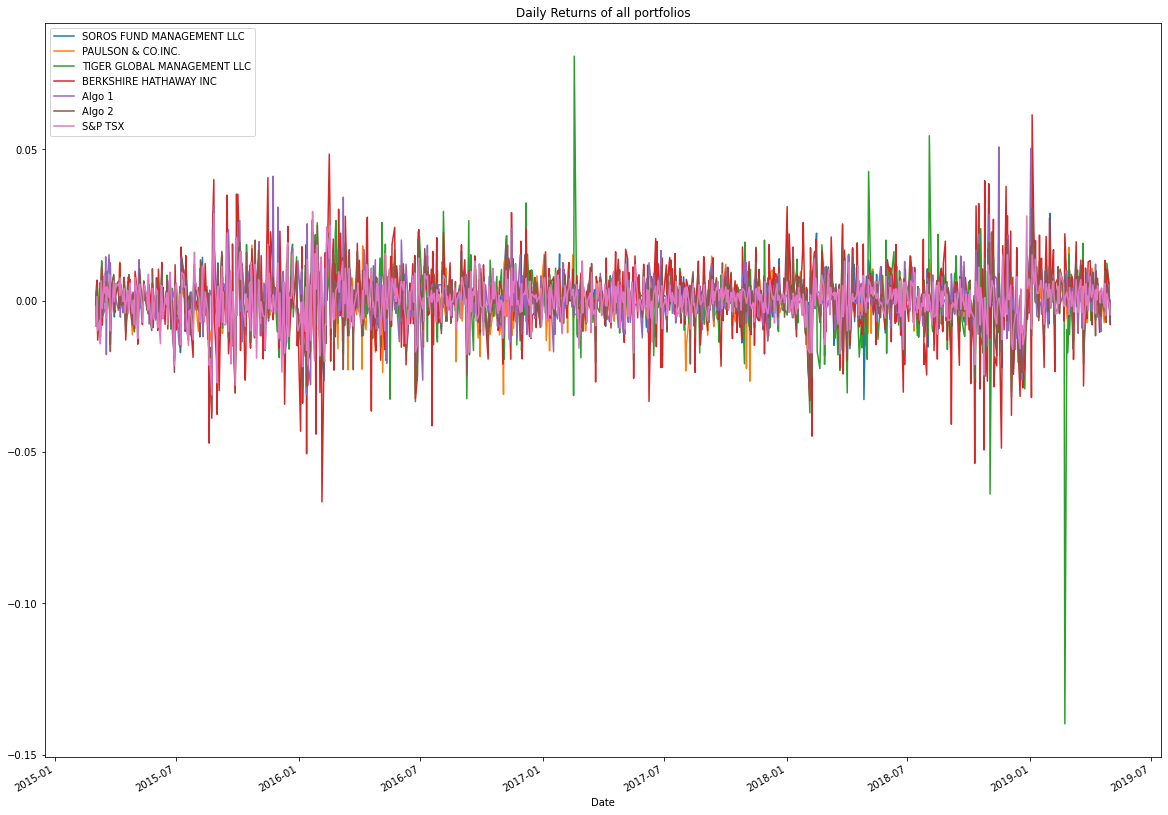

In [513]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,15), title="Daily Returns of all portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

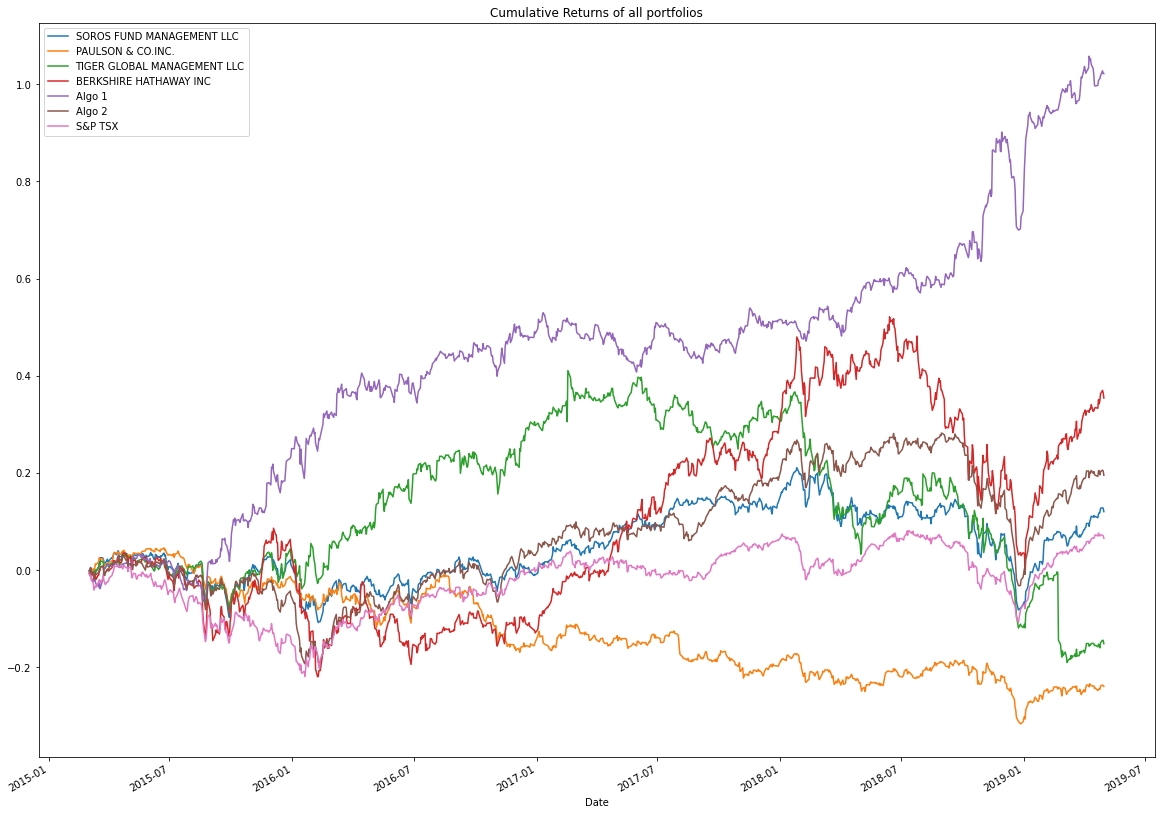

In [514]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,15), title="Cumulative Returns of all portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

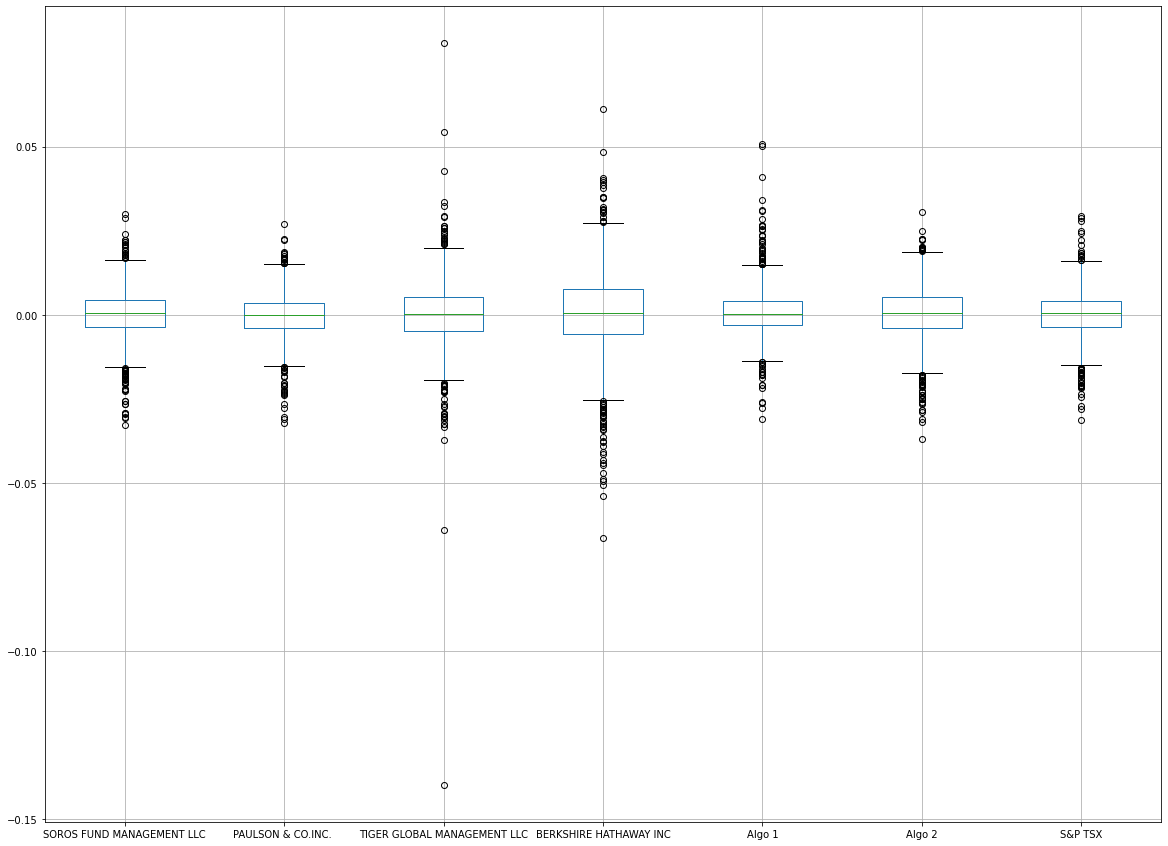

In [516]:
# Box plot to visually show risk
combined_returns_df.boxplot(figsize=(20,15))

### Calculate Standard Deviations

In [517]:
# Calculate the daily standard deviations of all portfolios
std_all_portfolios = combined_returns_df.std()
std_all_portfolios

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [519]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_returns_std = std_all_portfolios["S&P TSX"]

# Determine which portfolios are riskier than the S&P TSX 60
sp_tsx_risk = std_all_portfolios["S&P TSX"]
index = 0 

for portfolio_risk in std_all_portfolios:
    if portfolio_risk > sp_tsx_risk:
        print(f"Portfolio {std_all_portfolios.index[index]} is a riskier investment than the S&P TSX")
        
    index += 1
        


Portfolio SOROS FUND MANAGEMENT LLC is a riskier investment than the S&P TSX
Portfolio TIGER GLOBAL MANAGEMENT LLC is a riskier investment than the S&P TSX
Portfolio BERKSHIRE HATHAWAY INC is a riskier investment than the S&P TSX
Portfolio Algo 1 is a riskier investment than the S&P TSX
Portfolio Algo 2 is a riskier investment than the S&P TSX


### Calculate the Annualized Standard Deviation

In [520]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = std_all_portfolios * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation of all portfolios: 21-day window'}, xlabel='Date'>

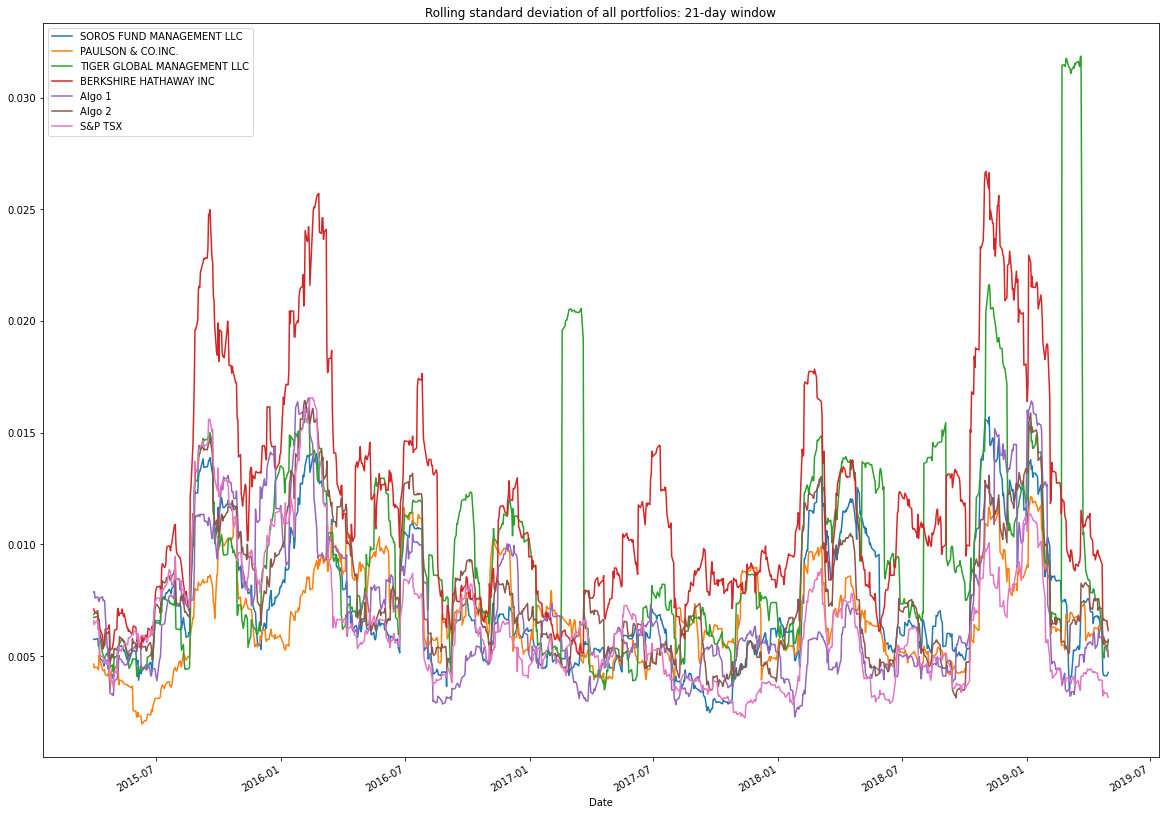

In [521]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_all_portfolios = combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_all_portfolios.plot(figsize=(20,15), title="Rolling standard deviation of all portfolios: 21-day window")

### Calculate and plot the correlation

<AxesSubplot:>

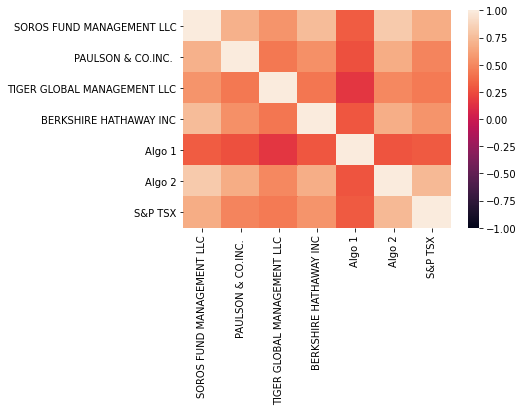

In [522]:
# Calculate the correlation
correlation = combined_returns_df.corr()
correlation
# Display de correlation matrix
import seaborn as sns

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Beta trend of Algo 1 over the S&P 60 TSX'}, xlabel='Date'>

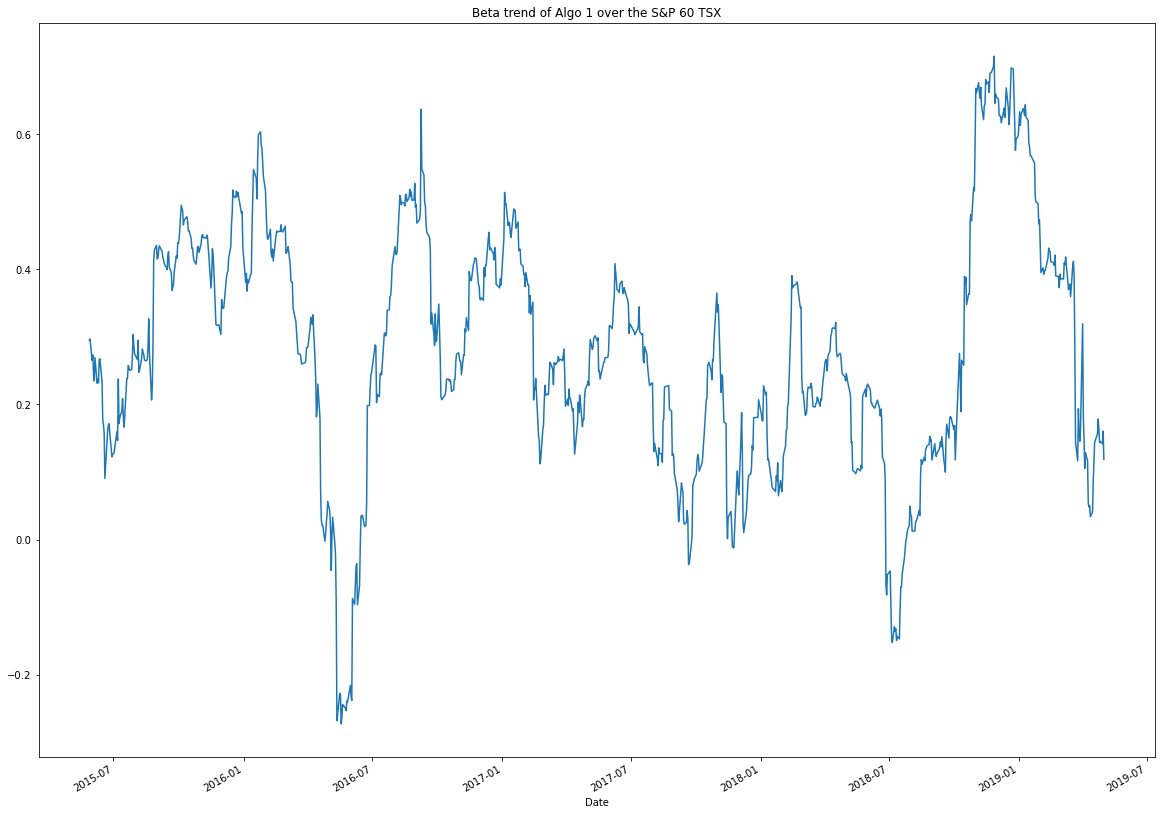

In [523]:
# Calculate covariance of a single portfolio
rolling_covariance_algo_1 = combined_returns_df["Algo 1"].rolling(window=60).cov(combined_returns_df["S&P TSX"])
# Calculate variance of S&P TSX
rolling_variance_sp_tsx = combined_returns_df["S&P TSX"].rolling(window=60).var()
# Computing beta
rolling_portfolio_beta = rolling_covariance_algo_1 / rolling_variance_sp_tsx
rolling_portfolio_beta
# Plot beta trend
rolling_portfolio_beta.plot(figsize=(20,15), title="Beta trend of Algo 1 over the S&P 60 TSX")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average of all portfolios'}, xlabel='Date'>

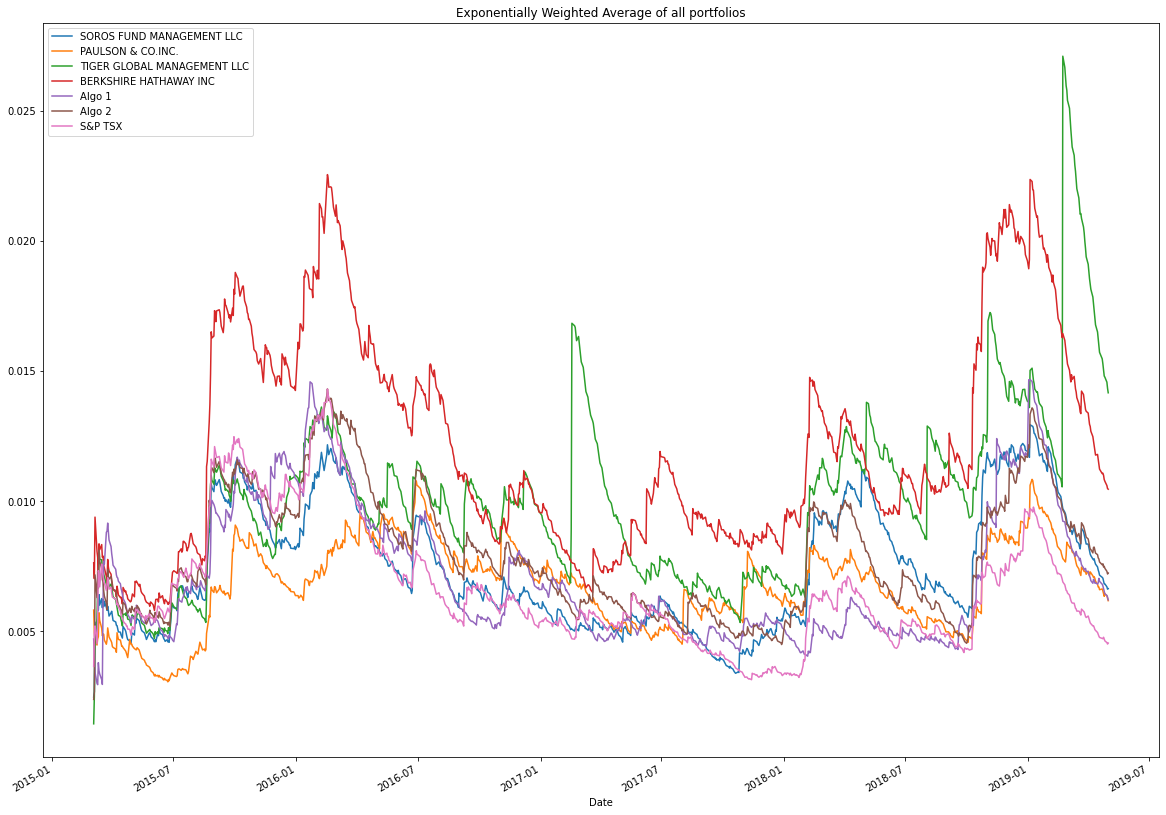

In [524]:
# Use `ewm` to calculate the rolling window
combined_returns_df.ewm(halflife=21).std().plot(figsize=(20,15), title="Exponentially Weighted Average of all portfolios")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [525]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = ((combined_returns_df.mean()) * 252) / (combined_returns_df.std() * np.sqrt(252))
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

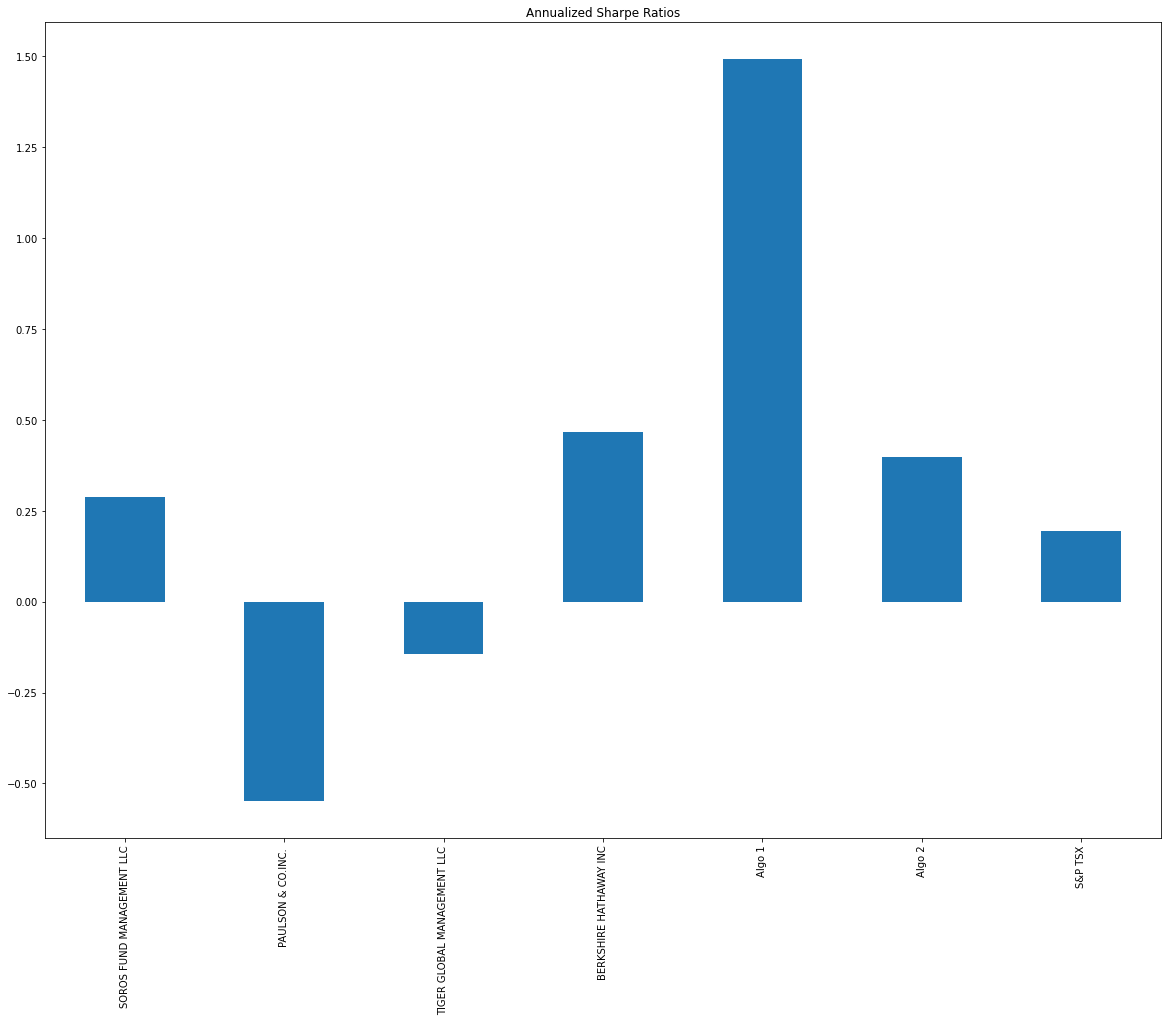

In [526]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", title="Annualized Sharpe Ratios", figsize=(20,15))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---The Algorithmic strategies, particularily portfolio 1, significantly outperforms both the S&P TSX 60 and all Whale portfolios based on visuals seen in analysis performed above including the cumulative returns and sharpe ratio metric graphics. Algorithmic portfolio 2, also shows strong performance versus the S&P TSX 60 and the majority of of whale portfolios, except for the Berkshire Hathaway portfolio which suggests it could be a better investment option based on its slightly higher sharpe ratio that can be viewed in the graph. The Algorithmic portfolios sharpe ratios of ~1.49 and ~0.39 respectivley, in comparison to the other portfolios tells us that the return-to-risk ratio of the Algo portfolios is much greater than that of the comparison portfolios - and that is a key indicator all investors must keep in mind when analyzing potiential investments.


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [527]:
# Reading data from 1st stock
shopify_prices_csv = Path("Resources/shopify_price_history.csv")
shopify_prices_df = pd.read_csv(shopify_prices_csv, infer_datetime_format=True, index_col="Date", parse_dates=True)
shopify_prices_df.head()

,Symbol,Close
Date,,
2018-03-19,SHOP,14.56
2018-03-20,SHOP,15.31
2018-03-21,SHOP,14.94
2018-03-22,SHOP,14.55
2018-03-23,SHOP,14.17


In [528]:
# Reading data from 2nd stock
amzn_prices_csv = Path("Resources/amzn_price_history.csv")
amzn_prices_df = pd.read_csv(amzn_prices_csv, infer_datetime_format=True, index_col="Date", parse_dates=True)
amzn_prices_df.head()


,Symbol,Close
Date,,
2018-03-19,AMZN,77.25
2018-03-20,AMZN,79.33
2018-03-21,AMZN,79.09
2018-03-22,AMZN,77.25
2018-03-23,AMZN,74.78


In [529]:
# Reading data from 3rd stock
aapl_prices_csv = Path("Resources/aapl_price_history.csv")
aapl_prices_df = pd.read_csv(aapl_prices_csv, infer_datetime_format=True, index_col="Date", parse_dates=True)
aapl_prices_df.head()

,Symbol,Close
Date,,
2018-03-19,AAPL,43.83
2018-03-20,AAPL,43.81
2018-03-21,AAPL,42.82
2018-03-22,AAPL,42.21
2018-03-23,AAPL,41.24


In [530]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([shopify_prices_df, amzn_prices_df, aapl_prices_df], axis="columns", join="inner")
combined_stocks_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-03-19,SHOP,14.56,AMZN,77.25,AAPL,43.83
2018-03-20,SHOP,15.31,AMZN,79.33,AAPL,43.81
2018-03-21,SHOP,14.94,AMZN,79.09,AAPL,42.82
2018-03-22,SHOP,14.55,AMZN,77.25,AAPL,42.21
2018-03-23,SHOP,14.17,AMZN,74.78,AAPL,41.24


In [531]:
# Reset Date index
combined_stocks_df.sort_index(inplace=True)

In [532]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df = combined_stocks_df.drop("Symbol", axis=1)
combined_stocks_df.head()

,Close,Close,Close
Date,,,
2018-03-19,14.56,77.25,43.83
2018-03-20,15.31,79.33,43.81
2018-03-21,14.94,79.09,42.82
2018-03-22,14.55,77.25,42.21
2018-03-23,14.17,74.78,41.24


In [533]:
#Set column names to symbols 
columns = ["SHOP", "AMZN", "AAPL"]
combined_stocks_df.columns = columns 
combined_stocks_df.head()

,SHOP,AMZN,AAPL
Date,,,
2018-03-19,14.56,77.25,43.83
2018-03-20,15.31,79.33,43.81
2018-03-21,14.94,79.09,42.82
2018-03-22,14.55,77.25,42.21
2018-03-23,14.17,74.78,41.24


In [534]:
# Calculate daily returns
combined_stocks_daily_returns_df = combined_stocks_df.pct_change()
combined_stocks_daily_returns_df

# Drop NAs
combined_stocks_daily_returns_df.dropna(inplace=True)

# Display sample data
combined_stocks_daily_returns_df.head()

,SHOP,AMZN,AAPL
Date,,,
2018-03-20,0.051511,0.026926,-0.000456
2018-03-21,-0.024167,-0.003025,-0.022598
2018-03-22,-0.026104,-0.023265,-0.014246
2018-03-23,-0.026117,-0.031974,-0.022980
2018-03-26,-0.035286,0.040251,0.047284


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [535]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_stocks_daily_returns_df.dot(weights)
portfolio_returns = portfolio_returns.rename("Custom")

# Display sample data
portfolio_returns.head()

Date
2018-03-20    0.025993
2018-03-21   -0.016597
2018-03-22   -0.021205
2018-03-23   -0.027024
2018-03-26    0.017417
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [536]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df_2 = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_daily_returns_df, portfolio_returns], axis="columns", join="inner")
combined_returns_df_2.sort_index(inplace=True)
combined_returns_df_2.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2018-03-20,-0.003359,-0.007334,-0.007544,0.003856,0.002693,-0.004031,0.001730,0.025993
2018-03-21,0.005400,0.004742,-0.013127,-0.004043,0.002112,0.005039,0.003773,-0.016597
2018-03-22,-0.017787,-0.011647,-0.023079,-0.022192,-0.005550,-0.016940,-0.017566,-0.021205
2018-03-23,-0.016559,-0.010530,-0.011274,-0.009716,-0.001382,-0.016363,-0.011441,-0.027024
2018-03-26,0.007620,0.008756,0.024917,0.025326,-0.003097,0.017333,0.004915,0.017417


In [537]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df_2 = combined_returns_df_2.dropna()
combined_returns_df_2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2018-03-20,-0.003359,-0.007334,-0.007544,0.003856,0.002693,-0.004031,0.001730,0.025993
2018-03-21,0.005400,0.004742,-0.013127,-0.004043,0.002112,0.005039,0.003773,-0.016597
2018-03-22,-0.017787,-0.011647,-0.023079,-0.022192,-0.005550,-0.016940,-0.017566,-0.021205
2018-03-23,-0.016559,-0.010530,-0.011274,-0.009716,-0.001382,-0.016363,-0.011441,-0.027024
2018-03-26,0.007620,0.008756,0.024917,0.025326,-0.003097,0.017333,0.004915,0.017417


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [538]:
# Calculate the annualized `std`
std_all_portfolios_2 = combined_returns_df_2.std()
annualized_std_2 = std_all_portfolios_2 * np.sqrt(252)
annualized_std_2

SOROS FUND MANAGEMENT LLC      0.145548
PAULSON & CO.INC.              0.113715
TIGER GLOBAL MANAGEMENT LLC    0.227392
BERKSHIRE HATHAWAY INC         0.231074
Algo 1                         0.126728
Algo 2                         0.135017
S&P TSX                        0.098791
Custom                         0.324949
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation for all portfolios: 21-day window'}, xlabel='Date'>

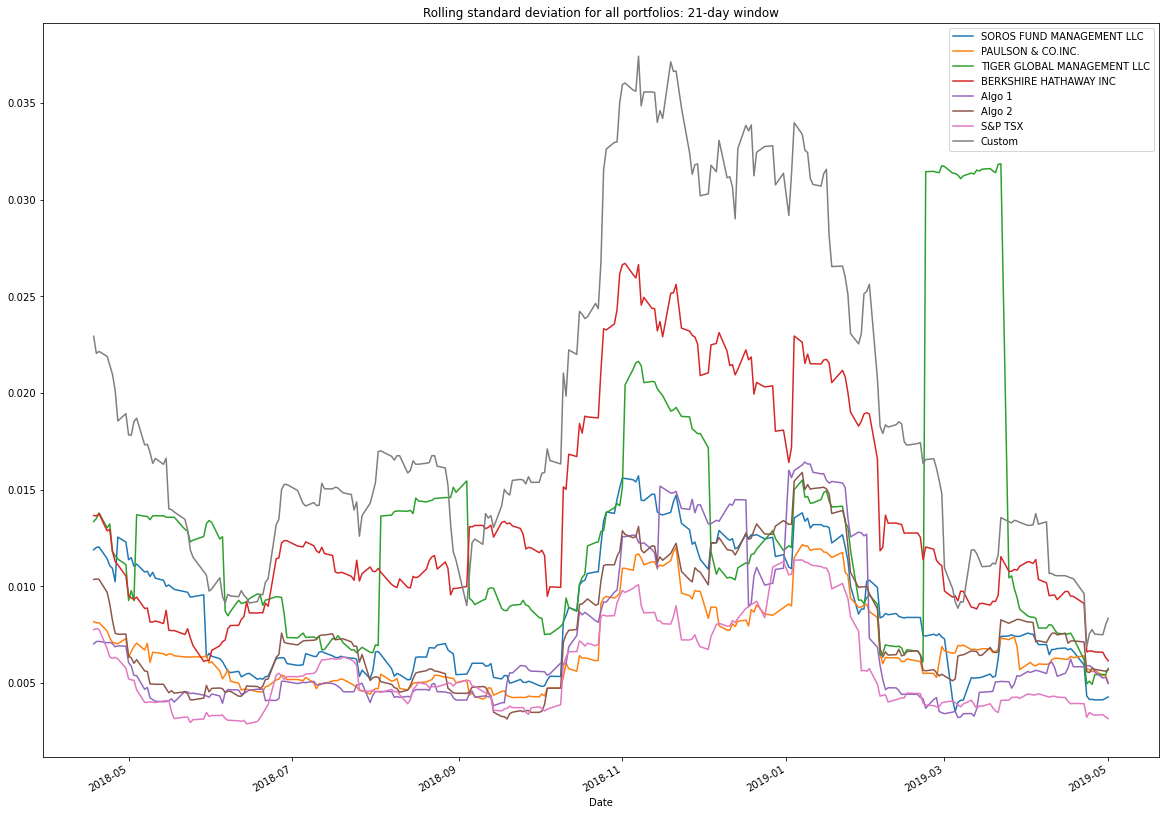

In [539]:
# Calculate rolling standard deviation
rolling_std_all_portfolios_2 = combined_returns_df_2.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_all_portfolios_2.plot(figsize=(20,15), title="Rolling standard deviation for all portfolios: 21-day window")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Portfolio correlations'}>

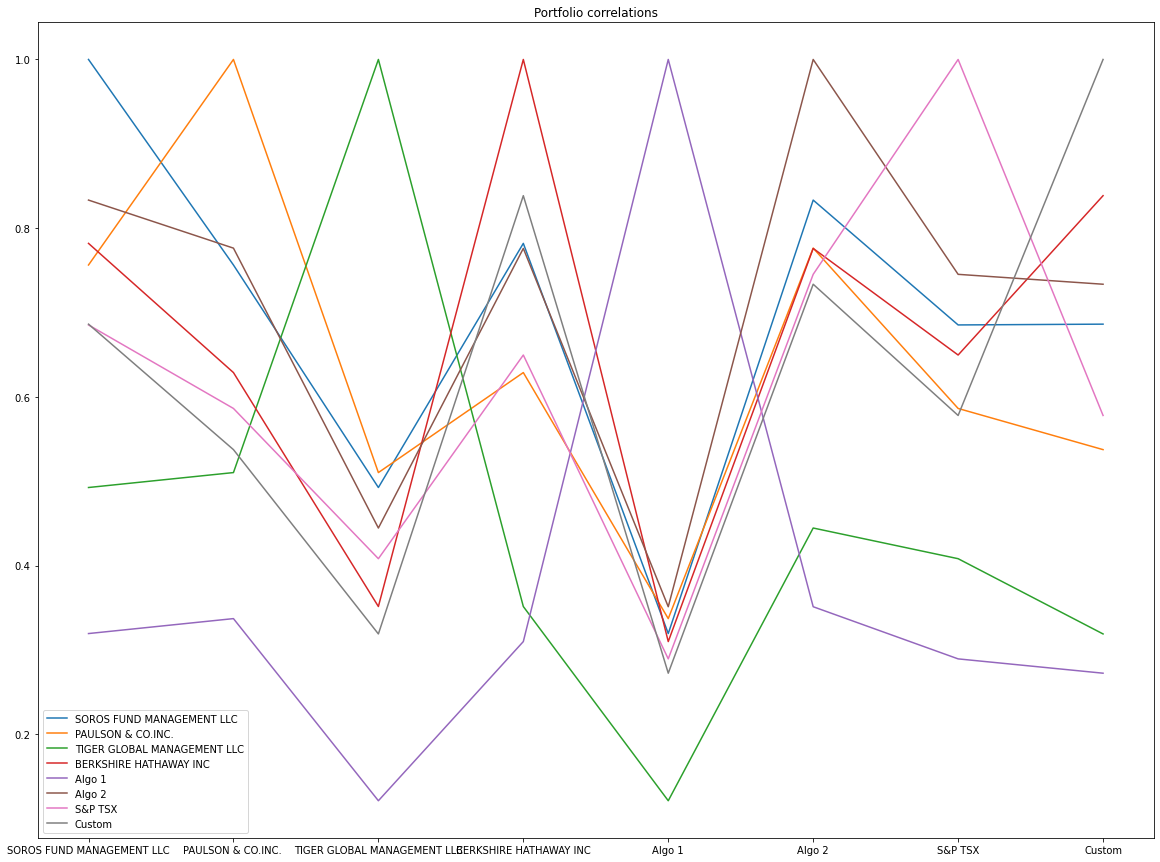

In [540]:
# Calculate and plot the correlation
correlation_2 = combined_returns_df_2.corr()
correlation_2.plot(figsize=(20,15), title="Portfolio correlations")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling Beta for Custom portfolio over the S&P 60 TSX: 60-day window'}, xlabel='Date'>

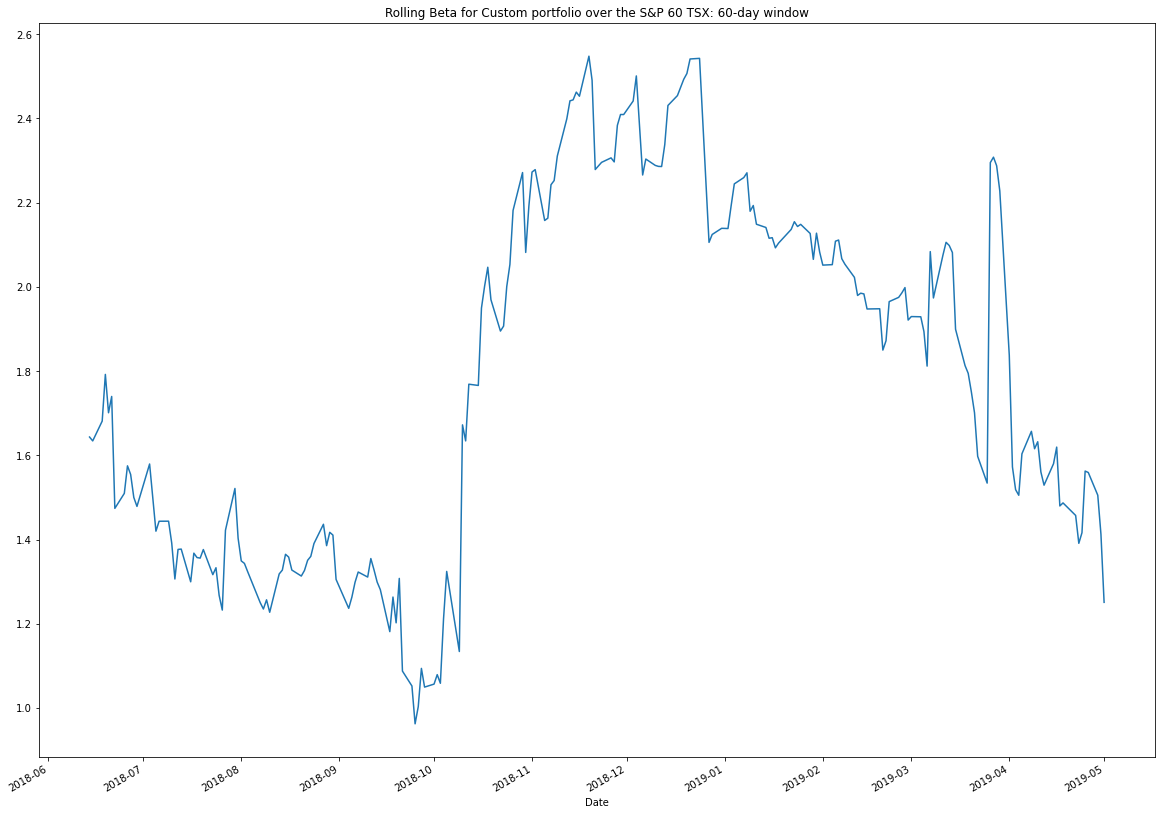

In [543]:
# Calculate and plot Beta
rolling_covariance_custom = combined_returns_df_2["Custom"].rolling(window=60).cov(combined_returns_df_2["S&P TSX"])
rolling_variance_sp_tsx_2 = combined_returns_df_2["S&P TSX"].rolling(window=60).var()
custom_rolling_beta = rolling_covariance_custom / rolling_variance_sp_tsx_2
custom_rolling_beta.plot(figsize=(20,15), title="Rolling Beta for Custom portfolio over the S&P 60 TSX: 60-day window")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [544]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe_ratios_2 = ((combined_returns_df_2.mean()) * 252) / (combined_returns_df_2.std() * np.sqrt(252))
annualized_sharpe_ratios_2

SOROS FUND MANAGEMENT LLC     -0.128492
PAULSON & CO.INC.             -0.185734
TIGER GLOBAL MANAGEMENT LLC   -1.162682
BERKSHIRE HATHAWAY INC        -0.121973
Algo 1                         2.133301
Algo 2                        -0.207876
S&P TSX                        0.485237
Custom                         0.859642
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe ratios'}>

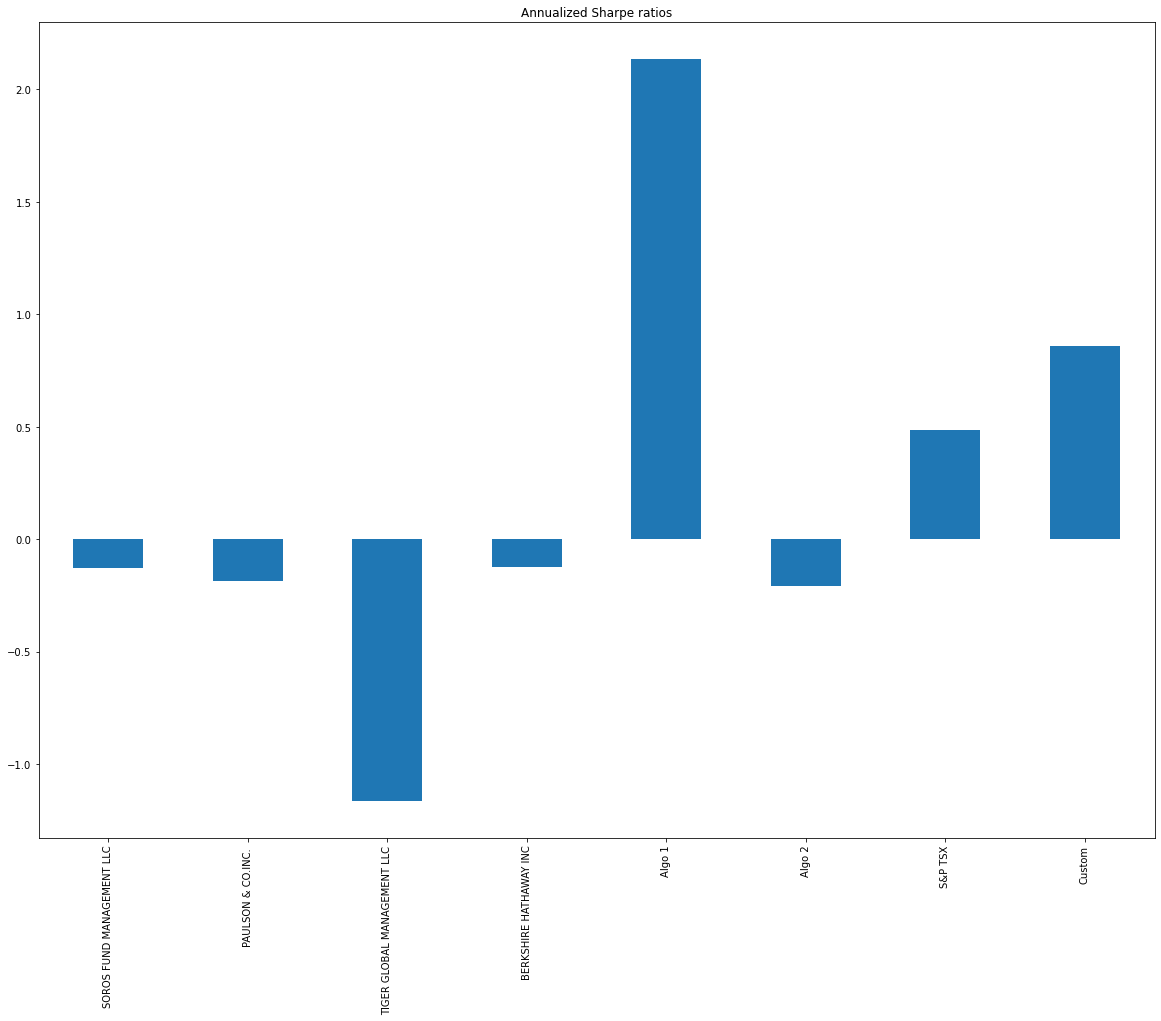

In [545]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_2.plot(kind="bar", title="Annualized Sharpe ratios", figsize=(20,15))

### How does your portfolio do?

Write your answer here!

In [546]:
#Based on the shape ratio analysis metrics, my custom portfolio has the second highest sharpe ratio of the group of
#portfolios which suggests it has one of the highest risk-to-return ratios of the group. Algorithmic portfolio 1 in 
#particular still has the highest sharpe ratio and indicates it is still the strongest performing portfolio of 
#the group even after the inclusion of my custom portfolio. However, the sharpe ratio analysis also suggests that my 
#custom portfolio does out perform all other portfolios, inlcuding out performing the S&P TSX. I believe the custom
#is a portfolio that would be worth investing in based on the metrics and analysis conducted above. 

#When computing the rolling beta for my custom portfolio over the S&P TSX, it could also be seen that there is significant
#amount of volitility in the movement of my custom portfolio with the overall larger market. This is the same case for the 
#risk of my custom portfolio based on the standard deviation metric fluctuations that can be view in the graph above. With 
#this said, with greater risk comes greater potiential reward and the investment attractiveness of my custom portfolio
#would be more directed to risk the loving investors who are looking for a large return. 